# Generative AI - SEBx & Combient Hackathon December 2023

> **`Run and execute each code cell block in the notebook in a consecutive manner. This is important since some code cell blocks relies on having properly executed some previous code cell block.`**
>
>
> Notebook code blocks can be executed via either:
> * **shift + enter**: executes current code block and moves to the cell below
> * **control + enter**: executes current code block

## Environment setup

Here we set up the environment and make sure we can access data via Google Drive. Run the below code blocks to install necessary packages.

Run the code below to clone the GenAI_BootCamp2023 directory which contains files which we will be using during this course. The code clones a directory called GenAI_BootCamp2023 from our Github repository.

> **`During execution of this cell block you will be prompted to provide your GDrive access to download the course content. Use your Google account credentials to allow this action.`**

## Packages and Imports

In [5]:
import os
import getpass
from colorama import Style
from typing import Optional
from langchain.docstore.document import Document
from helper import fetch_arxiv_data, get_API_embedding

## Import helper functions used in the Notebook

Run the code block below to import customized helper functions used in the notebook. These functions have been written to, for example, process PDF files and reduce clutter in the notebook by using explicit code. All of the imported functions are located in the file `helper_functions.py` where you may explore their definitions.

In [3]:
get_helper_funcs = False

if get_helper_funcs:
  import sys
  sys.path.append('/content/drive/MyDrive/bootcamp_dec7/')

  from helper_functions import *

## Setting the access key for OpenAI API

> **NB: Don't share the OpenAI access key in public spaces.**

> **The OpenAI API key can be set manually in the notebook by running the code cell block below.**
>
> **`A query box will appear the first time you run the below code cell block. Paste the OpenAI API key which you have been provided into the query box and press Enter/Return (access key is on the form sk-...)`**

In [6]:
# Here we can set the OpenAI API access key manually in case it fails to load from the environment.
if not os.environ.get("OPENAI_API_KEY"):
  api_key = getpass.getpass("Enter OpenAI API Key here")
  os.environ["OPENAI_API_KEY"] = api_key
else:
  print(f"OPENAI_API_KEY fetched from environment!")


# sk-...

Enter OpenAI API Key here ········


In [9]:
# You can optionally manually insert the OpenAI API key below between the quotation marks.
# Then uncomment the following two lines by removing the preceeding # and run the cell

#os.environ["OPENAI_API_KEY"] = "sk-..."
#print(f"The Open AI access key is given by: \n\n {os.environ['OPENAI_API_KEY']}")

In [10]:
# The following helps to format print output to match the size of the browser window
from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

# Hands-On 2: Introduction to Embeddings & Vector index storage

Some text here for introducing embeddings and vector stores ...

## Getting arXiv data & illustrating basic embedding concepts

We will start by collecting scientific abstracts from [arXiv](https://arxiv.org). We collevct these by fetching from their new releases section, which provides the daily deluge of preprint articles in various STEM subjects.

Below we try out the function to see the output from a single article.

In [9]:
# Example usage
url = 'https://arxiv.org/list/gr-qc/new'  # URL for the General Relativity and Quantum Cosmology section
papers = fetch_arxiv_data(url, subject="gr-qc")

# Print the first few papers
for paper in papers[:1]:
    print("")
    print(Style.BRIGHT + 'Title:' + Style.RESET_ALL, paper['title'])
    print(Style.BRIGHT + 'Abstract:' + Style.RESET_ALL, paper['abstract'])
    print(Style.BRIGHT + 'arXiv Topic:' + Style.RESET_ALL, paper['arxiv_topic'])
    print(Style.BRIGHT + 'arXiv Subject:' + Style.RESET_ALL, paper['subject'])
    print('---')

Extracted abstract for 36 new articles from gr-qc.
This excludes 35 replacements.

Title: Do Black Holes have Singularities?
Abstract: There is no proof that black holes contain singularities when they are
generated by real physical bodies. Roger Penrose claimed sixty years ago that
trapped surfaces inevitably lead to light rays of finite affine length
(FALL's). Penrose and Stephen Hawking then asserted that these must end in
actual singularities. When they could not prove this they decreed it to be self
evident. It is shown that there are counterexamples through every point in the
Kerr metric. These are asymptotic to at least one event horizon and do not end
in singularities.
arXiv Topic: General Relativity and Quantum Cosmology (gr-qc)
arXiv Subject: gr-qc
---


In [3]:
# Let's do it for all arXiv subjects
subjects = [
    "astro-ph",
    "gr-qc",
    "cond-mat",
    "quant-ph",
    "hep-th",
    "hep-ph",
    "hep-ex",
    "hep-lat",
    "nucl-ex",
    "nucl-th",
    "nlin",
    "math-ph",
    "math",
    "cs",
    "stat",
    "eess",
    ]


# We collect everything in a list of dictionaries
papers_list = []
for subject in subjects:
  papers_subject = fetch_arxiv_data(f"https://arxiv.org/list/{subject}/new", subject=subject)
  for paper in papers_subject:
    papers_list.append(paper)

print("")
print(f"We extracted a total of {len(papers_list)} abstracts")

Extracted abstract for 106 new articles from astro-ph.
This excludes 46 replacements.
Extracted abstract for 36 new articles from gr-qc.
This excludes 35 replacements.
Extracted abstract for 102 new articles from cond-mat.
This excludes 72 replacements.
Extracted abstract for 76 new articles from quant-ph.
This excludes 57 replacements.
Extracted abstract for 41 new articles from hep-th.
This excludes 42 replacements.
Extracted abstract for 49 new articles from hep-ph.
This excludes 44 replacements.
Extracted abstract for 18 new articles from hep-ex.
This excludes 18 replacements.
Extracted abstract for 6 new articles from hep-lat.
This excludes 7 replacements.
Extracted abstract for 6 new articles from nucl-ex.
This excludes 14 replacements.
Extracted abstract for 11 new articles from nucl-th.
This excludes 12 replacements.
Extracted abstract for 12 new articles from nlin.
This excludes 8 replacements.
Extracted abstract for 33 new articles from math-ph.
This excludes 24 replacements.

In [10]:
# Print the first few papers
for paper in papers_list[:1]:
    print(Style.BRIGHT + 'Title:' + Style.RESET_ALL, paper['title'])
    print(Style.BRIGHT + 'Abstract:' + Style.RESET_ALL, paper['abstract'])
    print(Style.BRIGHT + 'arXiv Topic:' + Style.RESET_ALL, paper['arxiv_topic'])
    print(Style.BRIGHT + 'arXiv Subject:' + Style.RESET_ALL, paper['subject'])
    print('---')

Title: A survey of Ly$α$ emission around Damped Ly$α$ absorbers at $z  \approx 2$ with the Keck Cosmic Web Imager
Abstract: We present Keck Cosmic Web Imager (KCWI) Ly$\alpha$ integral field
spectroscopy of the fields surrounding 14 Damped Ly$\alpha$ absorbers (DLAs) at
$z \approx 2$. Of these 14 DLAs, 9 have high metallicities ([M/H]$~> -0.3$),
and 4 of those 9 feature a CO-emitting galaxy at an impact parameter $\lesssim
30$ kpc. Our search reaches median Ly$\alpha$ line flux sensitivities of $\sim
2 \times 10^{-17}$ erg s$^{-1}$ cm$^{-2}$ over apertures of $\sim6$ kpc and out
to impact parameters of $\sim50$ kpc. We recover the Ly$\alpha$ flux of three
known Ly$\alpha$-emitting H I-selected galaxies in our sample. In addition, we
find two Ly$\alpha$ emitters at impact parameters of $\approx 50-70$ kpc from
the high metallicity DLA at $z \approx 1.96$ toward QSO B0551-366. This field
also contains a massive CO-emitting galaxy at an impact parameter of $\approx
15$ kpc. Apart from the

### Checking lengths of retrieved abstracts

In [11]:
abstract_lengths = []
for paper in papers_list:
  abstract_lengths.append(len(paper["abstract"]))

abstract_lengths.sort(reverse=True)
print("We print out the lengths of the 10 longest abstracts")
abstract_lengths[:10]

We print out the lengths of the 10 longest abstracts


[1917, 1917, 1913, 1912, 1912, 1912, 1911, 1911, 1911, 1910]

### Embedding models

In [43]:
# For embeddings we use models on the MTEB leaderboard at https://huggingface.co/spaces/mteb/leaderboard


# Voyage, currently nr 1 (REQUIRES REGISTERING TO GET API KEY)
#!pip install -q voyageai
#import voyageai
#from langchain.embeddings import VoyageEmbeddings
#os.environ["VOYAGE_API_KEY"] = "..."
#voyageai.api_key = os.environ["VOYAGE_API_KEY"]


# Cohere, currently nr 2 (REQUIRES REGISTERING TO GET API KEY)
#import cohere
#Get your API key from www.cohere.com
#os.environ["COHERE_API_KEY"] = "..."


# Open source HuggingFace embeddings, below is currently nr 3 & 12 (NO REGISTRATION REQUIRED)
#embedding_models_HF = [
#    "BAAI/bge-large-en-v1.5",
#    "BAAI/bge-small-en-v1.5"
#    ]

We will collect our abstracts into a list of Langchain Document objects. This is not necessary for doing embeddings, but will facilitate working with vector stores later on. The Document object class has the methods `page_content`, which stores the text string, and `metadata`, where additional metadata can be stored as a dictionary with key-value pairs.

In [12]:
documents =  []

for paper in papers_list:
  doc  = Document(
      page_content = paper["abstract"],
      metadata = {"title": paper["title"], "arxiv_topic": paper["arxiv_topic"], "subject": paper["subject"]}
  )
  documents.append(doc)
documents[0]

Document(page_content='We present Keck Cosmic Web Imager (KCWI) Ly$\\alpha$ integral field\nspectroscopy of the fields surrounding 14 Damped Ly$\\alpha$ absorbers (DLAs) at\n$z \\approx 2$. Of these 14 DLAs, 9 have high metallicities ([M/H]$~> -0.3$),\nand 4 of those 9 feature a CO-emitting galaxy at an impact parameter $\\lesssim\n30$ kpc. Our search reaches median Ly$\\alpha$ line flux sensitivities of $\\sim\n2 \\times 10^{-17}$ erg s$^{-1}$ cm$^{-2}$ over apertures of $\\sim6$ kpc and out\nto impact parameters of $\\sim50$ kpc. We recover the Ly$\\alpha$ flux of three\nknown Ly$\\alpha$-emitting H I-selected galaxies in our sample. In addition, we\nfind two Ly$\\alpha$ emitters at impact parameters of $\\approx 50-70$ kpc from\nthe high metallicity DLA at $z \\approx 1.96$ toward QSO B0551-366. This field\nalso contains a massive CO-emitting galaxy at an impact parameter of $\\approx\n15$ kpc. Apart from the field with QSO B0551-366, we do not detect significant\nLy$\\alpha$ emissi

Let's demonstrate how an embedding works by using open source embeddings for a single abstract. First let's see what the abstract looks like in plain text.

In [14]:
test_text = documents[0].page_content
print(test_text)

We present Keck Cosmic Web Imager (KCWI) Ly$\alpha$ integral field
spectroscopy of the fields surrounding 14 Damped Ly$\alpha$ absorbers (DLAs) at
$z \approx 2$. Of these 14 DLAs, 9 have high metallicities ([M/H]$~> -0.3$),
and 4 of those 9 feature a CO-emitting galaxy at an impact parameter $\lesssim
30$ kpc. Our search reaches median Ly$\alpha$ line flux sensitivities of $\sim
2 \times 10^{-17}$ erg s$^{-1}$ cm$^{-2}$ over apertures of $\sim6$ kpc and out
to impact parameters of $\sim50$ kpc. We recover the Ly$\alpha$ flux of three
known Ly$\alpha$-emitting H I-selected galaxies in our sample. In addition, we
find two Ly$\alpha$ emitters at impact parameters of $\approx 50-70$ kpc from
the high metallicity DLA at $z \approx 1.96$ toward QSO B0551-366. This field
also contains a massive CO-emitting galaxy at an impact parameter of $\approx
15$ kpc. Apart from the field with QSO B0551-366, we do not detect significant
Ly$\alpha$ emission in any of the remaining 8 high-metallicity DLA f

Now we call the open source embeddings from HuggingFace and check the first 10 entries of the resulting embedding vector.

In [17]:
embedding = get_API_embedding(test_text, model="BAAI/bge-small-en-v1.5")
embedding[:10]

YES


[-0.07353191077709198,
 0.016370592638850212,
 -0.051111165434122086,
 0.05200531706213951,
 0.02495511621236801,
 -0.05255206674337387,
 -0.017977450042963028,
 0.022253913804888725,
 -0.026830384507775307,
 -0.0328848697245121]

We can now loop through all abstracts, embed them and add the embeddings to an embedding list. Later we will see how we can do this using a vector store to manage the retrieved embeddings along with additional metadata.

**NB: This takes a couple of minutes to complete for all abstracts**

In [ ]:
embeddings = []
for document in documents:
  embedding = get_API_embedding(document.page_content, model="BAAI/bge-small-en-v1.5")
  embeddings.append(embedding)


YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES


Let's check the first few entries of the embedding of one article

In [49]:
embeddings[0][:10]

[-0.009030752815306187,
 -0.0010549213038757443,
 -0.008710711263120174,
 -0.01936950348317623,
 -0.017699718475341797,
 0.01796410232782364,
 -0.014972403645515442,
 -0.000595730496570468,
 -0.03587254509329796,
 -0.010484857484698296]

### Projecting embeddings using UMAP

We will now use the [UMAP](https://umap-learn.readthedocs.io/en/latest/) library for performing projections of the embedding vectors down to 2D, preserving both local and global structure of the data.

Let's remind ourselves what the arXiv subjects are.

In [ ]:
import numpy as np
# modules for plotting
import matplotlib.pyplot as plt
#import matplotlib.lines as mlines
from mycolorpy import colorlist as mcp
#from mpl_toolkits.mplot3d import Axes3D
#import plotly.express as px
import seaborn as sns
%matplotlib inline

In [ ]:
subjects

We prepare the data for input to the UMAP algorithm

In [ ]:
colors = mcp.gen_color(cmap="Spectral",n=len(subjects))
color_dict_subjects =dict(zip(subjects, colors))
    
    
embedding_data_array = np.array(embeddings)
print(f"We now have an array of embeddings with shape: {embedding_data_array.shape}")

In [ ]:
# We do the projection for several values of the n_neighbours hyperparameter
# This is the most important hyperparameter of the UMAP algorithm
n_neighbors = [2, 5, 15, 25, 50, 100] # 15 is default

umap_results = []
for n in n_neighbors:
    reducer = umap.UMAP(random_state=42,
                        n_components=2,
                        learning_rate=1.0,
                        min_dist=0.1,
                        n_neighbors=n,
                        metric='euclidean',
                        output_metric='euclidean',
                        target_metric='categorical',
                        target_n_neighbors=-1,
                        target_weight=0.5,)
    umap_embedding = reducer.fit_transform(embeddings)
    umap_results.append(umap_embedding)

Let's first display the result using matplotlib

Text(0.5, 1.0, 'UMAP projection of arXiv abstracts with n_neighbors=100')

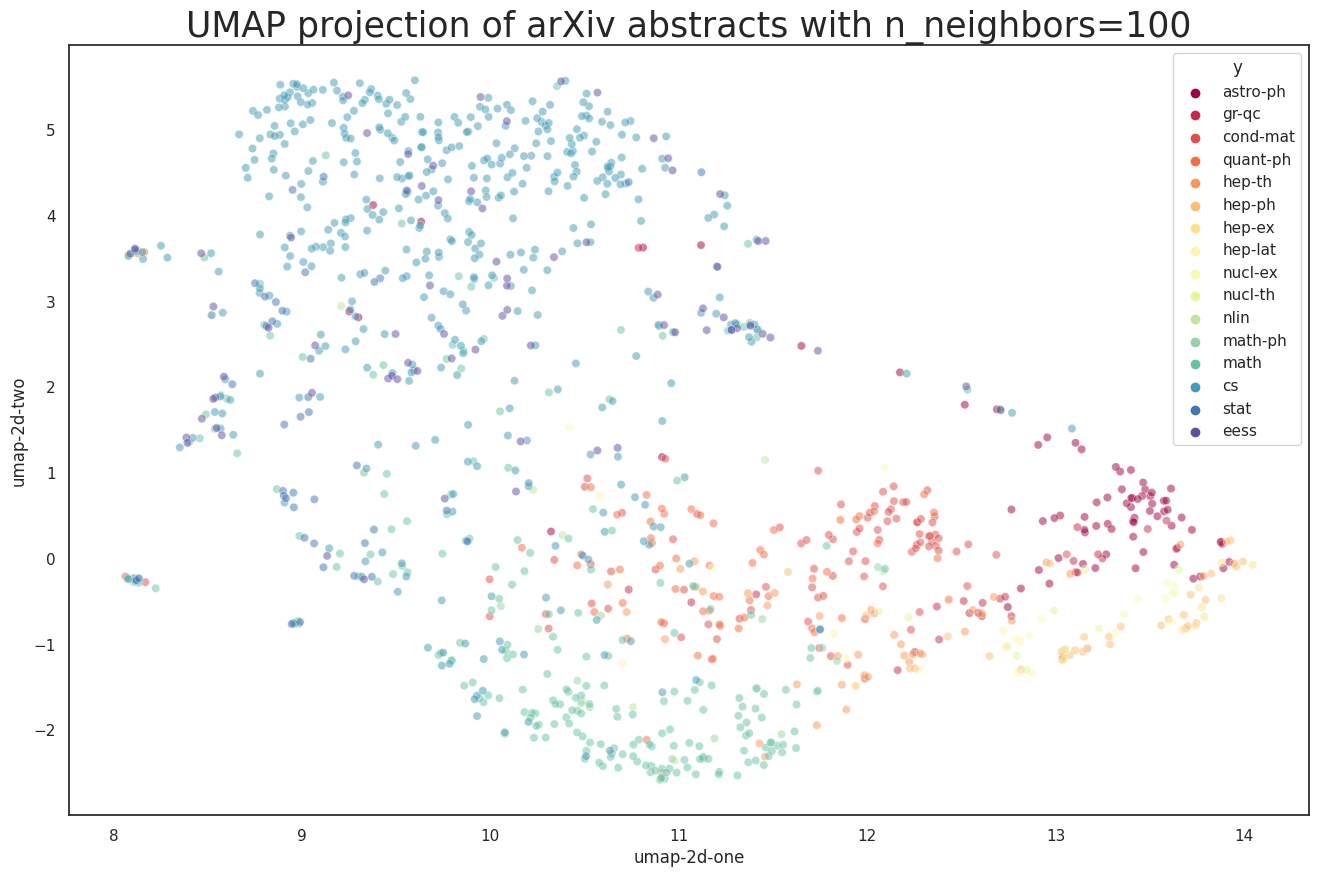

In [53]:
    # Let's choose one of the UMAP results to display
    nr_index = 5
    
    df_arxiv_umap = pd.DataFrame(np.array([umap_results[nr_index][:,0], umap_results[nr_index][:,1]]).T, columns=["umap-2d-one", "umap-2d-two"])
    
    subjects_list = []
    for paper in papers_list:
      subjects_list.append(paper["subject"])
    df_arxiv_umap["y"] = subjects_list
    
    plt.figure(figsize=(16,10))
    sns.scatterplot(
        x="umap-2d-one", y="umap-2d-two",
        hue="y",
        palette=color_dict_subjects,
        data=df_arxiv_umap,
        legend="full",
        alpha=0.5
    )
    plt.title(f"UMAP projection of arXiv abstracts with n_neighbors={n_neighbors[nr_index]}", fontsize=25)

Let's make a more interactive plot using Plotly where we can hover over the points interactively and inspect the results in more detail.

In [ ]:
subjects_list = []
for paper in papers_list:
  subjects_list.append(paper["arxiv_topic"])
df_arxiv_umap["y_long"] = subjects_list


fig = px.scatter(df_arxiv_umap,
                 x='umap-2d-one',
                 y='umap-2d-two',
                 color='y',
                 color_discrete_map=color_dict_subjects, # Use your color dictionary
                 hover_data=['y_long']) # This will show the category on hover

fig.update_traces(marker=dict(size=5, opacity=0.5)) # Adjust size and opacity similar to your seaborn plot
fig.update_layout(legend_title_text='arXiv subject') # Customize legend title
fig.show()

Tracing over the points and examining the hover labels we can see a clear clustering of physics topics and computer science topics respectively. The math topics tend to lie between these and we can see that they are closer to those topics which deal with similar lines of research.

> ```We can use the above plot to remove some of the topic subjects if we wish, to reduce the amount of data to embed and make the separation even more visually clear. Also consider changing color scheme.```

### Vector index store & Semantic similarity search

Let's now examine how we can store embeddings in an indexed vector database. There are many different vector stores to choose from which all perform similarly. Here we will make use of [FAISS](https://ai.meta.com/tools/faiss/), which is an open source vector store library developed by Meta.

We will then see how we can use this tool to perform a similarity search over the indexed embeddings and retrieve the most relevant article based on a query using semantic similarity.

We will make use of an open source model from HuggingFace for doing the embeddings here. There are many good options to choose from of varying sizes. As we will see even quite small models perform quite well with semantic search.

> ```The first time you run the below code snippet you will download the embedding model into memory and you will see the progress of this displayed.```

In [ ]:
# For embeddings we use a top ranked open source model on the MTEB leaderboard at https://huggingface.co/spaces/mteb/leaderboard
#embedding_model = [
#    "BAAI/bge-large-en-v1.5",
#    "BAAI/bge-small-en-v1.5"
#    ]
embedding_model = embedding_models_HF[1]


# We use the HuggingFaceEmbeddings wrapper to make an embedding object from our model
embedder = HuggingFaceEmbeddings(
      model_name = embedding_model,
      model_kwargs = {'device': 'cpu'},
      encode_kwargs = {'normalize_embeddings': True},
      cache_folder = f"{embedding_model}_cache",
      multi_process = False
      )

It is then straightforward to create a FAISS vector index using our Document and HuggingFaceEmbeddings objects. With the small BGE model this will take slightly less than one minute to complete for 50 abstracts. We will therefore pick out a subset of roughly 50 abstracts here for demonstrative purposes.

In [56]:
# We aim to pick out about 50 abstracts from across the documents list, irrespective of how many we originally retrieved
nr_abstracts_in_short_list = 50


# We pick out the baove nr of abstracts evenly spaced out over our list of retrieved abstracts
documents_short = documents[::max(1, len(documents) // nr_abstracts_in_short_list)]
#documents_short = documents[-nr_abstracts_in_short_list:]

print(f" The short list of documents contain {len(documents_short)} abstracts")

 The short list of documents contain 52 abstracts


In [57]:
# We embed and store embeddings for the shortened list of abstracts
faiss_index = FAISS.from_documents(
      documents=documents_short,
      embedding=embedder
      )

Let's pick out an article and display its abstract. This will allow us to make a query which we know matches this particular abstract.

In [58]:
# choose a number between 0-20 to pick out one of the indexed abstracts
abstract_nr = 25

documents_short[abstract_nr]

Document(page_content='We study the scheduling problem in a status update system composed of an\narbitrary number of information sources with different service time\ndistributions and weights for the purpose of minimizing the weighted sum age of\ninformation (AoI). In particular, we study open-loop schedulers which rely only\non the statistics (specifically, only on the first two moments) of the source\nservice times, in contrast to closed-loop schedulers that also make use of the\nactual realizations of the service times and the AoI processes in making\nscheduling decisions. Open-loop scheduling policies can be constructed off-line\nand are simpler to implement compared to their closed-loop counterparts. We\nconsider the generate-at-will (GAW) model, and develop an analytical method to\ncalculate the exact AoI for the probabilistic and cyclic open-loop schedulers.\nIn both cases, the server initiates the sampling of a source and the ensuing\ntransmission of the update packet from the 

Now we can construct a search query which is related to the above abstract. We then use this query to retrieve a nr of close matches from the indexed vector stored. These are retrieved as a list in sorted order, with the closest match appearing first.

Let's do this by having the LLM make a query for us from the above abstract.

In [59]:
# The system prompt will be placed at the top of every message and should set overall system behaviour
system_prompt = """
You are an expert in summarizing scientific literature.
"""

# We can try to set this quite low to make it hard for the retriever,
# noting that if several abstracts are on a similar topic then a very short summary
# should make it more difficult to retrieve the intended one
max_words_for_summary = 3

user_prompt = f"""
Consider carefully the abstract supplied below and construct a very brief summary of its content.
Try to use a maximum of {max_words_for_summary} words and do not include any mathematical formulas in your summary.

abstract: {documents_short[abstract_nr].page_content}
"""


# These are collected into a messages list of
#
#   SystemMessage - the system prompt
#   HumanMessage  - the user query
#   AIMessage     - the bot response, in case you wish to continue on a conversation
messages = [
    SystemMessage(content=system_prompt),
    HumanMessage(content=user_prompt),
]

In [7]:
# This creates an instance of the model interface which we can subsequently call on
chat_model = ChatOpenAI(
    openai_api_key=os.environ['OPENAI_API_KEY'],
    # The below parameters can be changed
    model="gpt-3.5-turbo-1106",
    temperature=0.0
)


# Here we collect the output from the chat model in the variable response
response = chat_model.invoke(messages)

# We can print out the response by calling on its content using a .content
print(response.content)

NameError: name 'ChatOpenAI' is not defined

Now we can use this short summary to try to find the correct article amongst all the ones we have embedded.

In [61]:
# We define a generic query which incorporates the summary from the LLM
search_query = f"Find an article which discusses: {response.content}"


# Define how many similar documents you want to retrieve
# These are returned in sorted order, with most similar placed first
nr_hits = 5


# Use FAISS to perform similarity search ...
most_similar = faiss_index.similarity_search(query = search_query, k=nr_hits)


# Lets check that the closest retrieved match is the same as abstract we used to construct the query
if documents_short[abstract_nr].metadata["title"] == most_similar[0].metadata["title"]:
  print(Style.BRIGHT + "SUCESS! We found the correct abstract as the top ranked choice!" + Style.RESET_ALL)
  print("--"*25)
  print(most_similar[0])
# In case it was not the top pick, we check if it was among the ones retrieved from the vector store
elif documents_short[abstract_nr].metadata["title"] in [most_similar[nr_hit].metadata["title"] for nr_hit in range(1,nr_hits)]:
  print(Style.BRIGHT + f"PARTIAL SUCESS! We found the correct abstract among the top {nr_hits} ranked choices!" + Style.RESET_ALL)
  print("--"*25)
  print(most_similar[0])
else:
  print(Style.BRIGHT + "FAILURE! We didn't retrieve the correct abstract as top choice!" + Style.RESET_ALL)

SUCESS! We found the correct abstract as the top ranked choice!
--------------------------------------------------
page_content='We study the scheduling problem in a status update system composed of an\narbitrary number of information sources with different service time\ndistributions and weights for the purpose of minimizing the weighted sum age of\ninformation (AoI). In particular, we study open-loop schedulers which rely only\non the statistics (specifically, only on the first two moments) of the source\nservice times, in contrast to closed-loop schedulers that also make use of the\nactual realizations of the service times and the AoI processes in making\nscheduling decisions. Open-loop scheduling policies can be constructed off-line\nand are simpler to implement compared to their closed-loop counterparts. We\nconsider the generate-at-will (GAW) model, and develop an analytical method to\ncalculate the exact AoI for the probabilistic and cyclic open-loop schedulers.\nIn both cases, 

We can inspect all the top ranked abstracts we retrieved and see how well they matched the summarization we used when searching.

In [62]:
cnt=1
for doc in most_similar:
  print(Style.BRIGHT + f"Hit nr {cnt}, Title: {doc.metadata['title']}" + Style.RESET_ALL)
  print(doc.page_content)
  print("--"*25)
  cnt+=1

Hit nr 1, Title: Minimizing Weighted Sum Age of Information with Open-Loop Cyclic  Scheduling
We study the scheduling problem in a status update system composed of an
arbitrary number of information sources with different service time
distributions and weights for the purpose of minimizing the weighted sum age of
information (AoI). In particular, we study open-loop schedulers which rely only
on the statistics (specifically, only on the first two moments) of the source
service times, in contrast to closed-loop schedulers that also make use of the
actual realizations of the service times and the AoI processes in making
scheduling decisions. Open-loop scheduling policies can be constructed off-line
and are simpler to implement compared to their closed-loop counterparts. We
consider the generate-at-will (GAW) model, and develop an analytical method to
calculate the exact AoI for the probabilistic and cyclic open-loop schedulers.
In both cases, the server initiates the sampling of a source 

If you try to play around with the above you will find that it is quite hard to get the retriever to fail based on a semantic similarity search even for a very condense summary of the abstracts.

#### Breaking the retriever?


In order to make things a bit harder we will try to collect a series of abstracts which are all related to the same topic, but which are not necessarily recent. To this end we fetch 100 article abstracts based on the query keyword `LLM`.

In [63]:
query_keyword = "LLM"
url = f"https://arxiv.org/search/?query={query_keyword}&searchtype=all&abstracts=show&order=-announced_date_first&size=100"


# We collect everything in a list of dictionaries
response = requests.get(url)
if response.status_code != 200:
  print('Failed to retrieve data from', url)

soup = BeautifulSoup(response.content, 'html.parser')


papers = []
for item in soup.find_all('li', class_='arxiv-result'):
  title = item.find('p', class_='title is-5 mathjax').text.strip()
  abstract = item.find('span', class_='abstract-full has-text-grey-dark mathjax').text.strip()
  papers.append({"title": title, "abstract": abstract})

print("")
print(f"We extracted a total of {len(papers)} abstracts on the topic of {query_keyword}")


We extracted a total of 100 abstracts on the topic of LLM


In [64]:
documents_topic =  []

for paper in papers:
  doc  = Document(
      page_content = paper["abstract"],
      metadata = {"title": paper["title"]}
  )
  documents_topic.append(doc)

We embed these documents just as before

In [65]:
# We embed and store embeddings for the shortened list of abstracts
faiss_index_topic = FAISS.from_documents(
      documents=documents_topic,
      embedding=embedder
      )

And then we pick out one of the abstracts to make a query we can try to use for search retrieval.

In [66]:
# choose a number between 0-99 to pick out one of the indexed abstracts
abstract_nr = 10

documents_topic[abstract_nr]

Document(page_content="Recent innovations in generative large language models (LLMs) have made their applications and use-cases ubiquitous. This has led to large-scale deployments of these models, using complex, expensive, and power-hungry AI accelerators, most commonly GPUs. These developments make LLM inference efficiency an important challenge. Based on our extensive characterization, we find that there are two main phases during an LLM inference request: a compute-intensive prompt computation, and a memory-intensive token generation, each with distinct latency, throughput, memory, and power characteristics. Despite state-of-the-art batching and scheduling, the token generation phase underutilizes compute resources. Specifically, unlike compute-intensive prompt computation phases, token generation phases do not require the compute capability of the latest GPUs, and can be run with lower power and cost.\n  With Splitwise, we propose splitting the two phases of a LLM inference request

In [67]:
# The system prompt will be placed at the top of every message and should set overall system behaviour
system_prompt = """
You are an expert in summarizing scientific literature.
"""

# We can try to set this quite low to make it hard for the retriever,
# noting that if several abstracts are on a similar topic then a very short summary
# should make it more difficult to retrieve the intended one
max_words_for_summary = 3

user_prompt = f"""
Consider carefully the abstract supplied below and construct a very brief summary of its content.
Try to use a maximum of {max_words_for_summary} words and do not include any mathematical formulas in your summary.

abstract: {documents_topic[abstract_nr].page_content}
"""


# These are collected into a messages list of
#
#   SystemMessage - the system prompt
#   HumanMessage  - the user query
#   AIMessage     - the bot response, in case you wish to continue on a conversation
messages = [
    SystemMessage(content=system_prompt),
    HumanMessage(content=user_prompt),
]

In [68]:
# This creates an instance of the model interface which we can subsequently call on
chat_model = ChatOpenAI(
    openai_api_key=os.environ['OPENAI_API_KEY'],
    # The below parameters can be changed
    model="gpt-3.5-turbo-1106",
    temperature=0.0
)


# Here we collect the output from the chat model in the variable response
response = chat_model.invoke(messages)

# We can print out the response by calling on its content using a .content
print(response.content)

Summary: 
Language model optimization


Now let's see if we can find the needle in this proverbial haystack as easily as before.

In [69]:
# We define a generic query which incorporates the summary from the LLM
search_query = f"Find an article which discusses: {response.content}"


# Define how many similar documents you want to retrieve
# These are returned in sorted order, with most similar placed first
nr_hits = 5


# Use FAISS to perform similarity search ...
most_similar_topic = faiss_index_topic.similarity_search(query = search_query, k=nr_hits)


# Lets check that the closest retrieved match is the same as abstract we used to construct the query
if documents_topic[abstract_nr].metadata["title"] == most_similar_topic[0].metadata["title"]:
  print(Style.BRIGHT + "SUCESS! We found the correct abstract as the top ranked choice!" + Style.RESET_ALL)
  print("--"*25)
  print(most_similar_topic[0])
# In case it was not the top pick, we check if it was among the ones retrieved from the vector store
elif documents_topic[abstract_nr].metadata["title"] in [most_similar_topic[nr_hit].metadata["title"] for nr_hit in range(1,nr_hits)]:
  print(Style.BRIGHT + f"PARTIAL SUCESS! We found the correct abstract among the top {nr_hits} ranked choices!" + Style.RESET_ALL)
  print("--"*25)
  print(most_similar_topic[0])
else:
  print(Style.BRIGHT + "FAILURE! We didn't retrieve the correct abstract as top choice!" + Style.RESET_ALL)

FAILURE! We didn't retrieve the correct abstract as top choice!
